<a href="https://colab.research.google.com/github/Roby290597/nlp_exercise/blob/main/bundestags_reden_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import os 

In [30]:
print(os.listdir())

['21032.xml', 'bundestags_reden_analyse.ipynb', 'bundestag_aktuell.txt', 'bundestag_aktuell.xml']


In [ ]:
import xml.etree.ElementTree as ET
tree = ET.parse('bundestag_21019.xml')
root = tree.getroot()

ParseError: syntax error: line 1, column 0 (<string>)

In [31]:
import requests

url = "https://www.bundestag.de/resource/blob/1115000/21032.xml"
response = requests.get(url)

with open("21032.xml", "wb") as f:
    f.write(response.content)


In [32]:
import requests
import xml.etree.ElementTree as ET

url = "https://www.bundestag.de/resource/blob/1115000/21032.xml"
response = requests.get(url)

# XML in einen Tree parsen
tree = ET.ElementTree(ET.fromstring(response.content))

# Wurzel-Element abrufen
root = tree.getroot()

print(root.keys())

['vertrieb', 'herstellung', 'sitzung-ort', 'herausgeber', 'issn', 'wahlperiode', 'sitzung-nr', 'sitzung-datum', 'sitzung-start-uhrzeit', 'sitzung-ende-uhrzeit', 'sitzung-naechste-datum', 'start-seitennr']


In [2]:
import matplotlib.pyplot as plt


In [33]:
import os


print(os.listdir())

root.attrib

['21032.xml', 'bundestags_reden_analyse.ipynb', 'bundestag_aktuell.txt', 'bundestag_aktuell.xml']


{'vertrieb': 'Bundesanzeiger Verlag GmbH, Postfach 1 0 05 34, 50445 Köln, Telefon (02 21) 97 66 83 40, Fax (02 21) 97 66 83 44, www.bundesanzeiger-verlag.de',
 'herstellung': 'H. Heenemann GmbH  Co. KG, Buch- und Offsetdruckerei, Bessemerstraße 83–91, 12103 Berlin, www.heenemann-druck.de',
 'sitzung-ort': 'Berlin',
 'herausgeber': 'Deutscher Bundestag',
 'issn': '0722-7980',
 'wahlperiode': '21',
 'sitzung-nr': '32',
 'sitzung-datum': '10.10.2025',
 'sitzung-start-uhrzeit': '09:00',
 'sitzung-ende-uhrzeit': '15:13',
 'sitzung-naechste-datum': '15.10.2025',
 'start-seitennr': '3443'}

In [34]:
root[2][1][1].attrib

{'anlagen-typ': 'Entschuldigte Abgeordnete'}

In [35]:
root[0][0][3].text

In [36]:
root[1][1][0].attrib

{'klasse': 'J'}

In [37]:
print(len(root))
print(len(root[0]))
print(len(root[0][0]))
print(len(root[0][0][0]))


4
2
5
2


In [72]:
# Durchsuche das XML nach den Indizes, wo "nachname", "vorname" und die entsprechende Rede ("p") vorkommen
def find_name_speech_indices(element, path="", current_name=None, current_vorname=None):
    results = []
    for i, child in enumerate(element):
        new_path = f"{path}.{i}" if path else str(i)
        # Speichere Nachname und Vorname temporär
        if child.tag == "nachname":
            current_name = child.text.strip()
        if child.tag == "vorname":
            current_vorname = child.text.strip()
        # Wenn Rede gefunden, speichere mit aktuellem Namen/Vornamen
        if child.tag == "p" and child.text and current_name and current_vorname:
            results.append((new_path, current_name, current_vorname, child.text.strip()))
        results.extend(find_name_speech_indices(child, new_path, current_name, current_vorname))
    return results

name_speech_indices = find_name_speech_indices(root)
for idx, nachname, vorname, rede in name_speech_indices:
    print(f"Index: {idx}, Nachname: {nachname}, Vorname: {vorname}, Rede: {rede[:60]}...")

## Filtert der Redner sowie der Bundestagsreden

 Mit *traverse()* werden die Rednernamen sowie die Redetexte (ohne Kommentare) aus der XML Datei extrahiert.


In [ ]:
important_tags = ["nachname", "vorname", "fraktion", "p"]
important_tags_frac = ["fraktion", "p"]


political_party = []
politician_name = []
politician_text = []

def traverse(element, path="", stop_tag=None):
    for i, child in enumerate(element):
        new_path = f"{path}.{i}" if path else str(i)

        if (
            child.text
            and child.text.strip()
            and child.tag in important_tags_frac
        ):

            if (stop_tag and child.text == stop_tag):
                print("🔴 STOP: Bedingung erfüllt.")
                return True  # <- Stop signal

            print(f"[{new_path}] {child.tag} = {child.text.strip()}")

            ### Fraktionen 
            if child.tag == "fraktion":
              if child.text.strip() == "BÜNDNIS\xa090/DIE GRÜNEN":
                political_party.append("GRÜNE")
              else:
                political_party.append(child.text.strip())
            ### Namen und Redetexte
            if child.tag in ["vorname", "nachname"]:
              politician_name.append(child.text.strip())
              print(politician_name, "!!!!!!!")
            if child.tag == "p":
              politician_text.append(child.text.strip())


        # Tiefer gehen – aber nur, wenn vorher nichts gestoppt hat
        if traverse(child, new_path, stop_tag):
            return True  # <- Weitergeben des Stop-Signals

    return False  # <- Nichts gefunden, weiterlaufen

traverse(root, stop_tag="Die Sitzung ist geschlossen.")

[0.1.1.4.0.0.0.2] fraktion = AfD
[0.1.1.5.0.0.0.2] fraktion = CDU/CSU
[0.1.1.6.0.0.0.2] fraktion = BÜNDNIS 90/DIE GRÜNEN
[0.1.1.7.0.0.0.2] fraktion = Die Linke
[0.1.1.8.0.0.0.3] fraktion = SPD
[0.1.1.9.0.0.0.2] fraktion = AfD
[0.1.1.10.0.0.0.2] fraktion = CDU/CSU
[0.1.1.11.0.0.0.3] fraktion = BÜNDNIS 90/DIE GRÜNEN
[0.1.1.12.0.0.0.2] fraktion = CDU/CSU
[0.1.1.13.0.0.0.2] fraktion = AfD
[0.1.1.14.0.0.0.2] fraktion = CDU/CSU
[0.1.1.15.0.0.0.2] fraktion = SPD
[0.1.1.16.0.0.0.2] fraktion = CDU/CSU
[0.1.2.3.0.0.0.2] fraktion = AfD
[0.1.2.4.0.0.0.2] fraktion = CDU/CSU
[0.1.2.5.0.0.0.3] fraktion = BÜNDNIS 90/DIE GRÜNEN
[0.1.2.6.0.0.0.3] fraktion = SPD
[0.1.2.7.0.0.0.2] fraktion = Die Linke
[0.1.2.8.0.0.0.2] fraktion = CDU/CSU
[0.1.2.9.0.0.0.2] fraktion = AfD
[0.1.2.10.0.0.0.2] fraktion = AfD
[0.1.2.11.0.0.0.2] fraktion = SPD
[0.1.2.12.0.0.0.2] fraktion = BÜNDNIS 90/DIE GRÜNEN
[0.1.2.13.0.0.0.2] fraktion = CDU/CSU
[0.1.2.14.0.0.0.2] fraktion = AfD
[0.1.2.15.0.0.0.3] fraktion = CDU/CSU
[0.1.3.4.

True

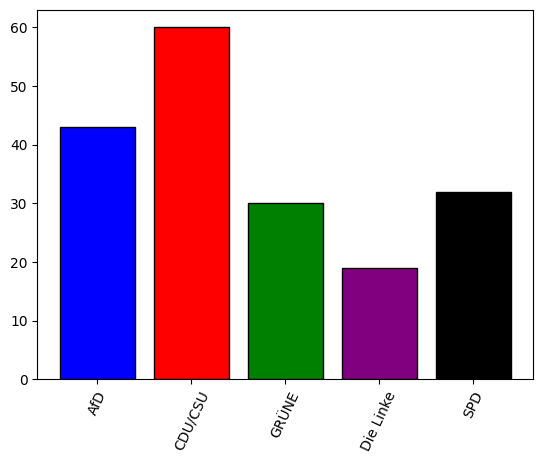

In [66]:
from collections import Counter
import matplotlib.pyplot as plt


poli_party = Counter(political_party)
poli_party_col = ["blue", "red", "green", "purple", "black"]

plt.bar(list(poli_party.keys()), list(poli_party.values()), color=poli_party_col, edgecolor='black')
plt.xticks(rotation=65)
plt.show()